In [1]:
%pylab
%matplotlib inline
import numpy as np
from scipy.fftpack import fft, fftshift

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


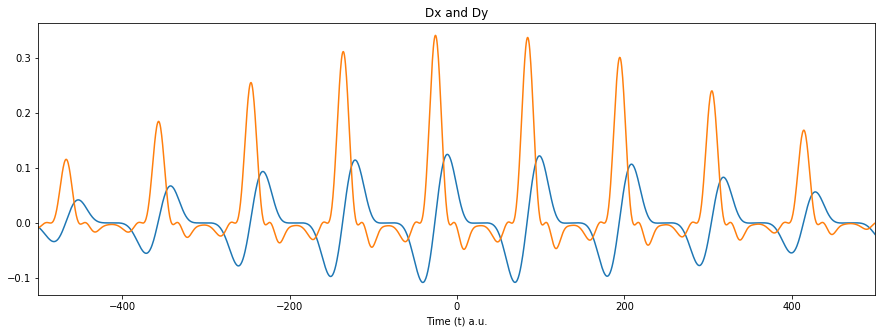

In [18]:
dt = 0.6
w0 = 0.057
w1 = 0.114
Up0 = 0.5 + 3.17 * 0.08 **2 /(4 * w0**2)

data = loadtxt('./HHG_30.dat')
time, Ex, Ey, Ax, Ay, Dx, Dy = data [:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6]

figure(figsize=(15,5))
plot(time, Dx)
plot(time, Dy)
xlabel('Time (t) a.u.')
title('Dx and Dy')
xlim(-500, 500)
subplots_adjust(wspace=0.3)

[68.82124385457423, 67.6144881513913, 64.70205297179567, 60.157461966152404, 54.09543111794554, 46.66898695000488, 38.06558632465388, 28.50239059807617, 18.220773682555944, 7.480235261450649, 3.448162097470682, 14.288637316648689, 24.767648792274525, 34.62081067224285, 43.59955504124379, 51.477423449350376, 58.05576491061936, 63.168765975032585, 66.68761018448811, 68.52375648370477, 68.63113530820587, 67.00732820586663, 63.69361810971654, 58.77392833125401, 52.37270380121683, 44.65176328962579, 35.8061975444747, 26.05944807355634, 15.657644704623056, 4.863397803749452, 6.05083915763111, 16.809654809681007, 27.14162996253793, 36.78619374622967, 45.500193242858344, 53.06403624984566, 59.28721975764808, 64.01313470692945, 67.12301708441608, 68.53891803662088]


(0, 2000)

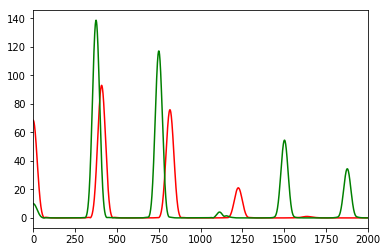

In [35]:
thz_x,thz_y,three_x,three_y,one_x,one_y = [] , [] , [],[],[],[]
for i in range(40):
    path = './HHG_%d.dat' % i
    data = loadtxt(path)
    time, Ex, Ey, Ax, Ay, Dx, Dy = data [:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6]
    mul=7*Dx.size
    Dx_ext = np.pad(Dx, (mul, mul), 'constant')
    Dy_ext = np.pad(Dy, (mul, mul), 'constant')
    frex = fft(2 * Dx_ext)
    frey = fft(2 * Dy_ext)
    time_ext = linspace(-(mul/Dx.size+0.5)*len(time)*dt,(mul/Dx.size+0.5)*len(time)*dt,Dy_ext.size)
    f_scale = np.linspace(0, len(Dx_ext)*(2*np.pi*(1/(len(Dx_ext)*dt))), len(Dx_ext))
    thz_x.append(max(abs(frex[:100])))
    thz_y.append(max(abs(frey[:100])))
    one_x.append(max(abs(frex[250:500])))
    one_y.append(max(abs(frey[250:500])))
    three_x.append(max(abs(frex[1000:1300])))
    three_y.append(max(abs(frey[1000:1300])))
print(thz_x)
    
plot((abs(frex)), lw=1.5, c='r')
plot(100*f_scale/0.015199,(abs(frey)), lw=1.5, c='g')
xlim(0, 2000)
# ylim(0, 115)

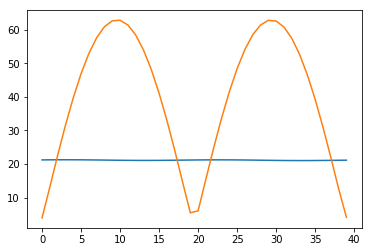

In [37]:
plot(three_x)
plot(three_y)

(-50, 50)

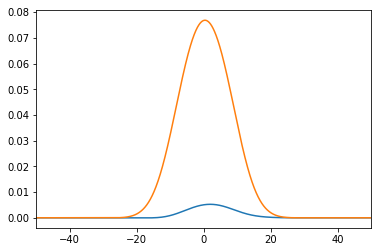

In [20]:
Dx_thz = zeros(Dx_ext.size, complex)
Dy_thz = zeros(Dy_ext.size, complex)
con_1=int(0.0151992/(2*pi*(1/(len(time_ext)*dt)))+1)
con_2=int(0.0151992/(2*pi*(1/(len(time_ext)*dt))))
Dx_thz[0:con_1]=frex[0:con_1]
Dy_thz[0:con_1]=frey[0:con_1]
Dx_thz[(frex.size-con_2):frex.size]=frex[(frex.size-con_2):Dx_ext.size]
Dy_thz[(frex.size-con_2):frex.size]=frey[(frex.size-con_2):Dx_ext.size]
sx=ifft(Dx_thz)
sy=ifft(Dy_thz)
plot(time_ext/41.34, sx)
plot(time_ext/41.34, sy)
xlim(-50, 50)